# Qiskit playground
This notebook is just used to play around with the `qiskit` basics.

## Creating a basic quantum circuit
Just to test that `qiskit` is working

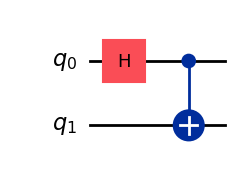

In [1]:
from qiskit import *

# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

## Testing Qiskit Aer
Check that it's working

In [2]:
from qiskit_aer.primitives import SamplerV2

# Generate 3-qubit GHZ state
circ = QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
job = sampler.run([circ], shots=128)

# Perform an ideal simulation
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
print('Counts(ideal):', counts_ideal)

Counts(ideal): {'000': 65, '111': 63}


### Going through the Qiskit Aer Simulator tutorial

In [3]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

simulator = AerSimulator()
#simulator.available_devices()
simulator.available_methods()

('automatic',
 'statevector',
 'density_matrix',
 'stabilizer',
 'matrix_product_state',
 'extended_stabilizer',
 'unitary',
 'superop')

Simulating a quantum circuit:

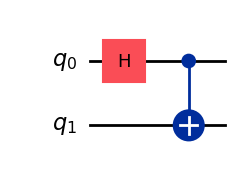

In [4]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.draw("mpl")

Simple run:

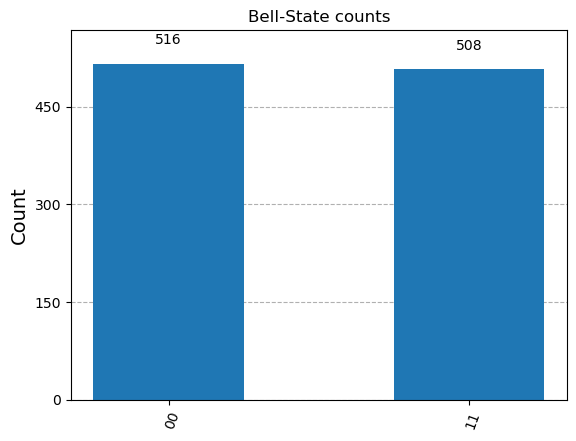

In [5]:
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [6]:
r_dict = result.to_dict()
for k in r_dict.keys():
    print(f"{k}: {r_dict[k]}")    

backend_name: aer_simulator
backend_version: 0.17.0
date: 2025-04-16T13:34:45.443596
header: None
qobj_id: 
job_id: b7216263-80b2-4cc6-873a-bf94766f52f4
status: COMPLETED
success: True
results: [{'shots': 1024, 'success': True, 'data': {'counts': {'0x3': 508, '0x0': 516}}, 'meas_level': <MeasLevel.CLASSIFIED: 2>, 'header': {'creg_sizes': [['meas', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-164', 'qreg_sizes': [['q', 2]], 'metadata': {}}, 'status': 'DONE', 'seed_simulator': 526420737, 'metadata': {'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0097415, 'sample_measure_time': 0.0030142, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 32491, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'f

In [7]:
for r in r_dict["results"][0].keys():
    print(f"{r}: {r_dict["results"][0][r]}")

shots: 1024
success: True
data: {'counts': {'0x3': 508, '0x0': 516}}
meas_level: 2
header: {'creg_sizes': [['meas', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-164', 'qreg_sizes': [['q', 2]], 'metadata': {}}
status: DONE
seed_simulator: 526420737
metadata: {'batched_shots_optimization': False, 'required_memory_mb': 0, 'method': 'stabilizer', 'active_input_qubits': [0, 1], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 2, 'num_clbits': 2, 'time_taken': 0.0097415, 'sample_measure_time': 0.0030142, 'input_qubit_map': [[0, 0], [1, 1]], 'max_memory_mb': 32491, 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'runtime_parameter_bind': False, 'num_bind_params': 1, 'fusion': {'enabled': False}}
time_taken: 0.0097415


Return measurment outcomes for all individual shots:

In [8]:
# Run and get memory
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '11', '00', '11', '11', '11', '11', '11', '11']


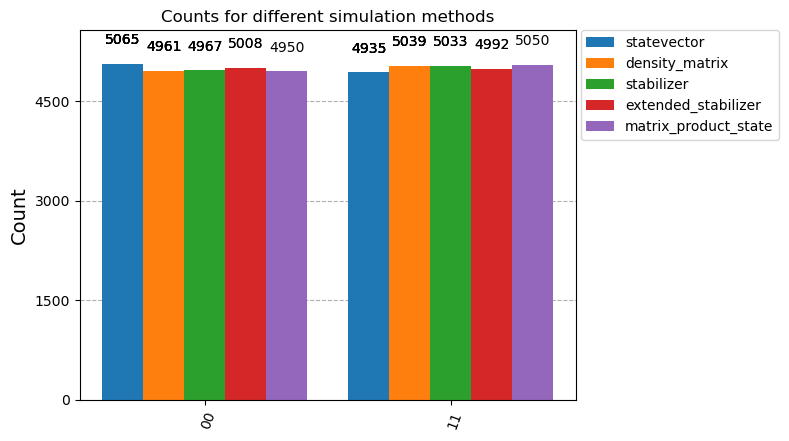

In [9]:
# Increase shots to reduce sampling variance
shots = 10000

# Statevector simulation method
sim_statevector = AerSimulator(method='statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Stabilizer simulation method
sim_stabilizer = AerSimulator(method='stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Extended Stabilizer method
sim_extstabilizer = AerSimulator(method='extended_stabilizer')
job_extstabilizer = sim_extstabilizer.run(circ, shots=shots)
counts_extstabilizer = job_extstabilizer.result().get_counts(0)

# Density Matrix simulation method
sim_density = AerSimulator(method='density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = AerSimulator(method='matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)


plot_histogram([ counts_statevector,counts_stabilizer ,counts_extstabilizer, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=[ 'statevector',
                       'density_matrix','stabilizer','extended_stabilizer', 'matrix_product_state'])

## Building the qPCA circuit

In [10]:
import numpy as np
from qiskit_aer import *

Main steps:

1. Data Loading: prepare initial state through amplitude encoding of input matrix $A\in\mathbb{R}^{N\times N}$
2. Unitary Transformation: 
3. Phase estimation:
4. Quantum State Tomography:
5. PC reconstruction

### Data Loading
Let's get started with the example matrix that Dri et al also used in their code:

In [11]:
matr = np.array([[1.5, 0.5],[0.5, 1.5]]) # example matrix from their code
print(f'Matrix:\n {matr.round(2)}\n')

# normalize it with the trace
norm_factor = np.trace(matr) 
matr /= norm_factor
print(f'Normalized Matrix:\n {matr.round(2)}\n')

# check eigenvectors and eigenvalues
for eigval, eigvec in zip(np.linalg.eig(matr)[0][::-1], np.rot90(np.linalg.eig(matr)[1])):
        print(f'eigenvalue: {eigval:.0f} - eigenvector: {eigvec.round(3)}')

Matrix:
 [[1.5 0.5]
 [0.5 1.5]]

Normalized Matrix:
 [[0.5  0.17]
 [0.17 0.5 ]]

eigenvalue: 0 - eigenvector: [-0.707  0.707]
eigenvalue: 1 - eigenvector: [0.707 0.707]


Now, it's time to encode the matrix in a state. We start by computing the angles for the Ry rotation gates that are necessary to create the desired input state that will correspond to the input matrix:

In [12]:
# compute the angles for the Ry gates to create the input state
# corresponding to the input matrix elements

# normalize to compute input probabilities:
input_probs = (matr**2/np.sum(matr**2)).flatten()

# binary tree nodes computation


In [13]:
print(input_probs)

[0.45 0.05 0.05 0.45]


HOWEVER for now I am lazy and skipping this step, replacing it with `qiskit`'s Initialize:

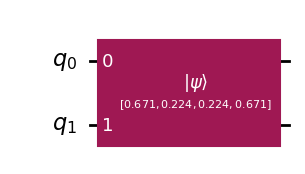

In [22]:
#from qiskit import QuantumCircuit
from qiskit.circuit.library import Initialize

# get amplitudes & normalize
input_ampl = matr.flatten()
input_ampl /= np.linalg.norm(input_ampl)

# number of qubits
n_qubits = int(np.ceil(np.log2(len(input_probs))))
# Pad with zeros if not a power of 2
if 2**n_qubits != len(input_ampl):
    padded_ampl = np.zeros(2**n_qubits)
    padded_ampl[:len(input_ampl)] = input_ampl
    input_ampl = padded_ampl

# Build the circuit
qc = QuantumCircuit(n_qubits)
init = Initialize(input_ampl)
qc.append(init, qc.qubits)

qc.draw('mpl')

In [23]:
#Check matrix encoding into quantum state
qc.save_statevector()
qc.measure_all()

{'00': 4543, '11': 4482, '01': 502, '10': 473}
Statevector([0.67082039+0.j, 0.2236068 +0.j, 0.2236068 +0.j,
             0.67082039+0.j],
            dims=(2, 2))


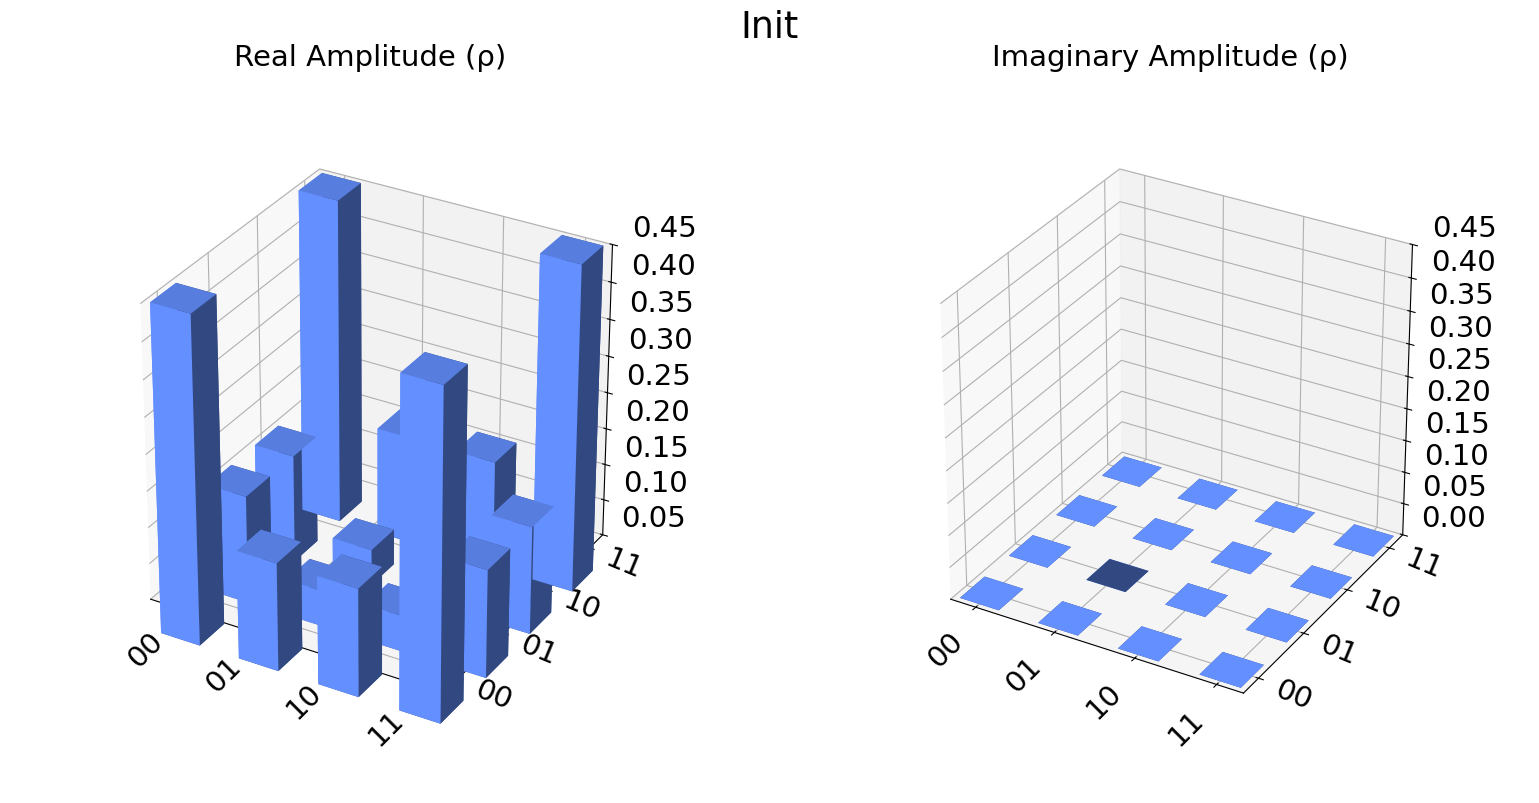

In [24]:
# Transpile for simulator
simulator = AerSimulator()
circ = transpile(qc, simulator)

# Run and get counts
result = simulator.run(circ, shots=10000).result()
print(result.get_counts(circ))
statevector = result.get_statevector(circ)
print(statevector)
plot_state_city(statevector, title='Init')

### Phase estimation